### Step 0

In [1]:
# CodeGrade step0

# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris



### Step 1

In [2]:
# CodeGrade step0

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target



In [ ]:
# Look at it


# Check for missing values


In [ ]:
# Visualize relationships


In [3]:
# CodeGrade step1

# Encode target variable as categorical
data['species'] = pd.Categorical.from_codes(data['target'], iris.target_names)
y = data['species']


# Separate features and target variable
X = data[iris.feature_names]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# Shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


### Step 2

In [4]:
# CodeGrade step0

# Train the SVM Model
# Initialize the SVM classifier with an RBF kernel
svc = SVC(kernel='rbf', probability=True, random_state=42)


# Train the model
svc.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [5]:
# CodeGrade step2

# Predict on the test data
y_pred = svc.predict(X_test)

### Step 3


In [6]:
# CodeGrade step3

# Classification report and confusion matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, target_names=iris.target_names)


In [7]:
# Classification Report
cr = classification_report(y_test, y_pred, target_names=iris.target_names)


### Step 4

In [8]:
# CodeGrade step0

# Optimize the Model
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [9]:
# CodeGrade step4

# Grid Search Best
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Accuracy: 0.9833333333333332


### Step 5

In [ ]:
# CodeGrade step0

# Train the optimized model
optimized_model = grid_search.best_estimator_
optimized_model.fit(X_train, y_train)

In [11]:
# CodeGrade step5

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='versicolor')

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

ROC AUC: 0.99


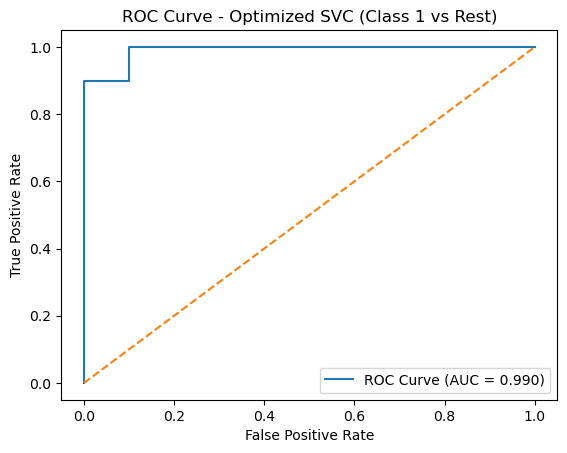

In [12]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Optimized SVC (Class 1 vs Rest)")
plt.legend(loc="lower right")
plt.show()
